In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal, stats
import emd

In [97]:
f1 = 5
f2 = 10

w1 = f1 * 2 * np.pi
w2 = f2 * 2 * np.pi

x1 = np.linspace(0, 20, 1000)
x2 = np.cos(w1 * x1)
x3 = np.cos(w2 * x1)

eps = np.random.normal(0, 1, size=1000)

X = x1 + x2 + x3 + eps

In [98]:
imf = emd.sift.sift(X, imf_opts={'sd_thresh': 0.1})

In [99]:
dt = np.diff(x1).mean()

In [100]:
IP, IF, IA = emd.spectra.frequency_transform(imf, 1/dt, 'nht')
all_cycles = emd.cycles.get_cycle_vector(IP, return_good=False)
good_cycles = emd.cycles.get_cycle_vector(IP, return_good=True)

(5.0, 10.0)

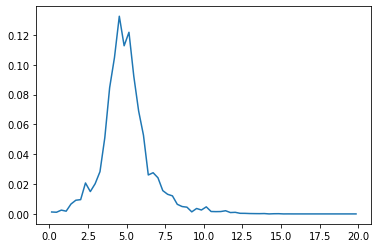

In [101]:
freq_range = (0, 20, 64)

hht_f, spec_linear = emd.spectra.hilberthuang(IF, IA, edges=freq_range, scaling='density', sum_imfs=False)

plt.plot(hht_f, spec_linear[:, 1])

w1/(2*np.pi), w2/(2*np.pi)

In [102]:
f1, f2

(5, 10)

In [103]:
hht_f[np.argmax(spec_linear[:, 0])], hht_f[np.argmax(spec_linear[:, 1])]

(7.65625, 4.53125)

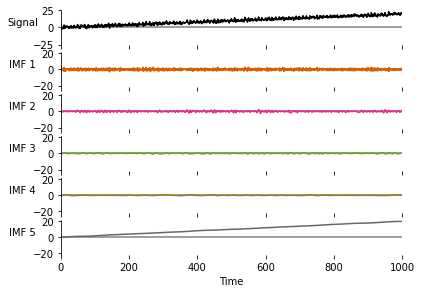

In [104]:
emd.plotting.plot_imfs(imf, cmap=True, scale_y=True)

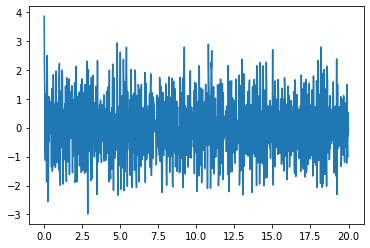

In [105]:
plt.plot(x1, imf[:, 0])

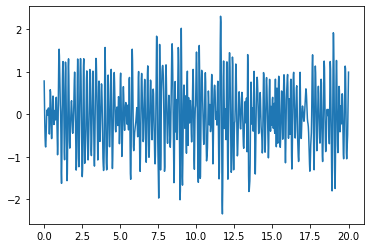

In [106]:
plt.plot(x1, imf[:, 1])

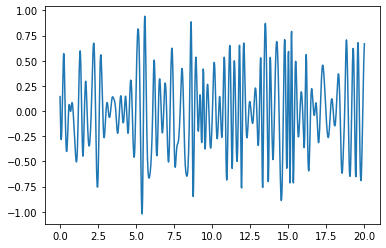

In [107]:
plt.plot(x1, imf[:, 2])

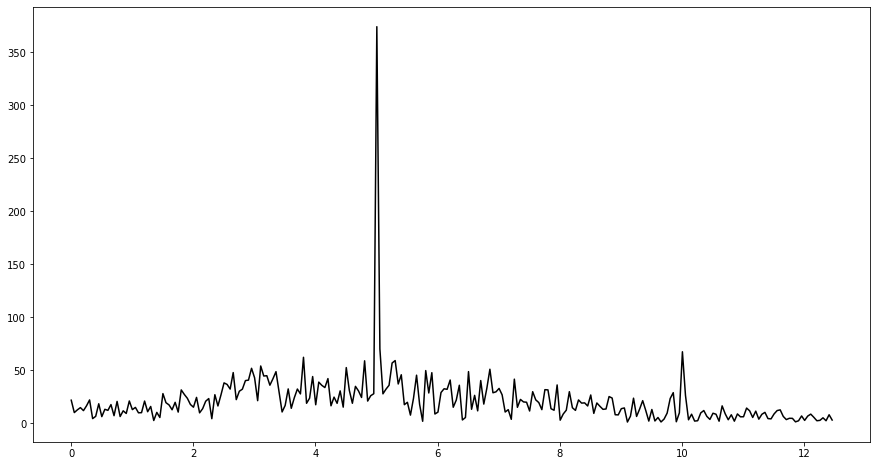

In [110]:
F = np.fft.fft(imf[:, 1])

f = np.linspace(0, 1/(2*dt), X.size//2, endpoint=True)
F_abs = np.abs(F)[:len(f)//2]
f = f[:len(f)//2]

freq = np.fft.fftfreq(n=X.size, d=1/dt)

plt.figure(figsize=(15,8))
#plt.plot(freq[:len(freq)//2], np.abs(F[:len(freq)//2]), c='k', label="Real part")
plt.plot(f, F_abs, c='k', label="Real part")

In [111]:
f[F_abs.argmax()]

5.005010020040081